<a href="https://colab.research.google.com/github/Ajay-Kandagatla/DATASCIENCE/blob/main/Loan_Approval_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import Data Manupulating Library
import pandas as pd
import numpy as np

# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarning Library
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s) - % (levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model Started')

In [2]:
# Import data using pandas function

df = pd.read_csv('loan_data.csv')
df.sample(frac = 1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1477,24.0,male,High School,44317.0,0,RENT,1200.0,EDUCATION,11.49,0.03,2.0,670,No,0
14166,26.0,male,Bachelor,37016.0,1,OWN,1925.0,VENTURE,6.03,0.05,3.0,557,No,0
14099,24.0,male,Associate,121210.0,0,MORTGAGE,16800.0,EDUCATION,7.88,0.14,4.0,637,Yes,0
16085,22.0,male,Bachelor,65786.0,0,RENT,8075.0,MEDICAL,13.06,0.12,3.0,543,Yes,0
39712,33.0,female,Associate,77943.0,11,RENT,3000.0,EDUCATION,9.34,0.04,9.0,603,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,22.0,female,Bachelor,60982.0,0,MORTGAGE,22000.0,EDUCATION,9.91,0.36,2.0,678,No,0
343,26.0,female,Bachelor,163683.0,5,RENT,25000.0,DEBTCONSOLIDATION,12.53,0.15,4.0,582,Yes,0
12672,26.0,male,Master,101786.0,4,MORTGAGE,2150.0,HOMEIMPROVEMENT,13.47,0.02,2.0,610,Yes,0
28706,35.0,male,High School,38321.0,11,MORTGAGE,15000.0,VENTURE,13.16,0.39,9.0,637,Yes,0


In [6]:
# Checking Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

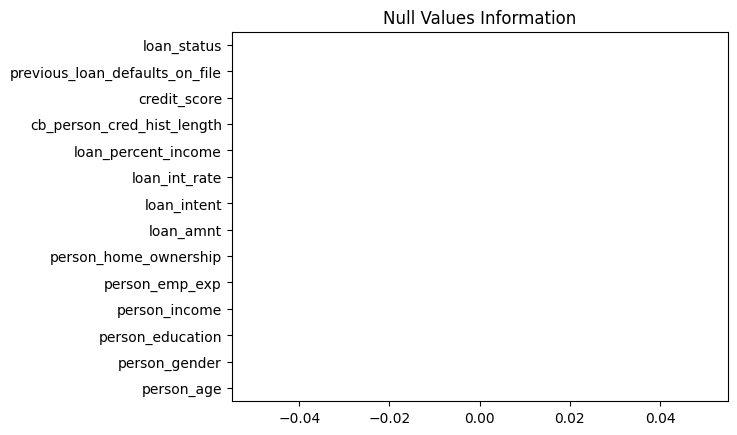

In [7]:
# Checking Null Values Present in Dataset

df.isnull().sum().plot(kind = 'barh')
plt.title('Null Values Information')
plt.show()

In [8]:
# S plit the dataset into Categorical and Numerical cols...
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')

In [21]:
# Exploratory Data Analysis:
# 1. Univariate Analysis

'''
Step1: Create a Blank List: stats[]
Step2: Create Dictionary using OrderedDict
Step3: Append list with Dictionary
Step4: Convert stats[] i.e List info DataFrame
'''

from collections import OrderedDict
stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Count':df[i].count(),
        'Miximum':df[i].max(),
        'Minimum':df[i].min(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Kurtosis':df[i].kurtosis(),
        'Skewness':df[i].skew()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Count,Miximum,Minimum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness
0,person_age,45000,144.00,20.00,27.764178,26.00,24.00,30.00,6.00,6.045108,18.649449,2.548154
1,person_income,45000,7200766.00,8000.00,80319.053222,67048.00,47204.00,95789.25,48585.25,80422.498632,2398.684769,34.137583
2,person_emp_exp,45000,125.00,0.00,5.410333,4.00,1.00,8.00,7.00,6.063532,19.168324,2.594917
3,loan_amnt,45000,35000.00,500.00,9583.157556,8000.00,5000.00,12237.25,7237.25,6314.886691,1.351215,1.179731
4,loan_int_rate,45000,20.00,5.42,11.006606,11.01,8.59,12.99,4.40,2.978808,-0.420335,0.213784
5,loan_percent_income,45000,0.66,0.00,0.139725,0.12,0.07,0.19,0.12,0.087212,1.082416,1.034512
6,cb_person_cred_hist_length,45000,30.00,2.00,5.867489,4.00,3.00,8.00,5.00,3.879702,3.725945,1.631720
7,credit_score,45000,850.00,390.00,632.608756,640.00,601.00,670.00,69.00,50.435865,0.203022,-0.610261
8,loan_status,45000,1.00,0.00,0.222222,0.00,0.00,0.00,0.00,0.415744,-0.214176,1.336351


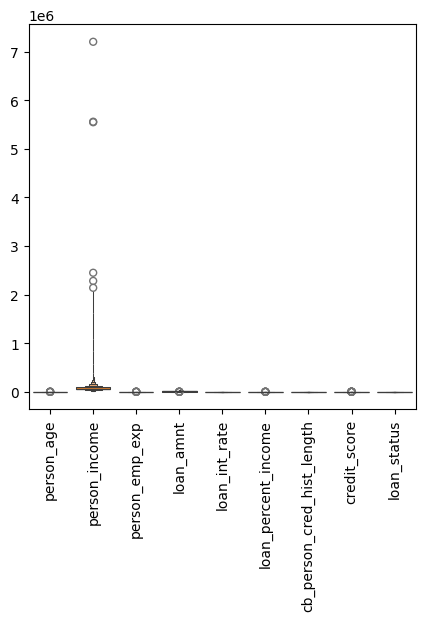

In [22]:
plt.figure(figsize = (5,5))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

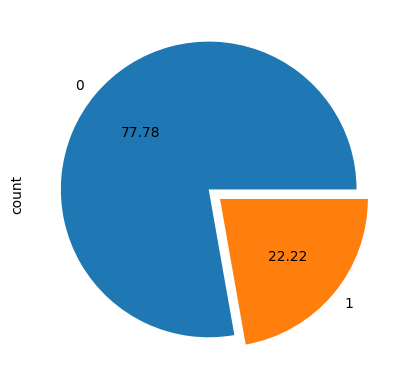

In [23]:
# Distribution of loan status

'''
Data Insights:
77.78% people Not appoved their loan status from bank
22.22% people approved their loan status from bank
'''

df['loan_status'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.05,0.05])
plt.show()

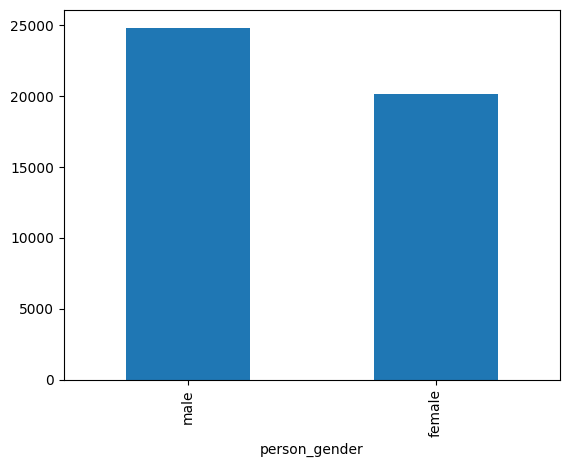

In [24]:
# Gender Distribution

df['person_gender'].value_counts().plot(kind = 'bar')
plt.show()

In [37]:
# Loan status based on Gender
# Loan is approved and Gender must be male
loan_status_approved_male = df[(df['loan_status'] == 1) & (df['person_gender'] == 'male')]

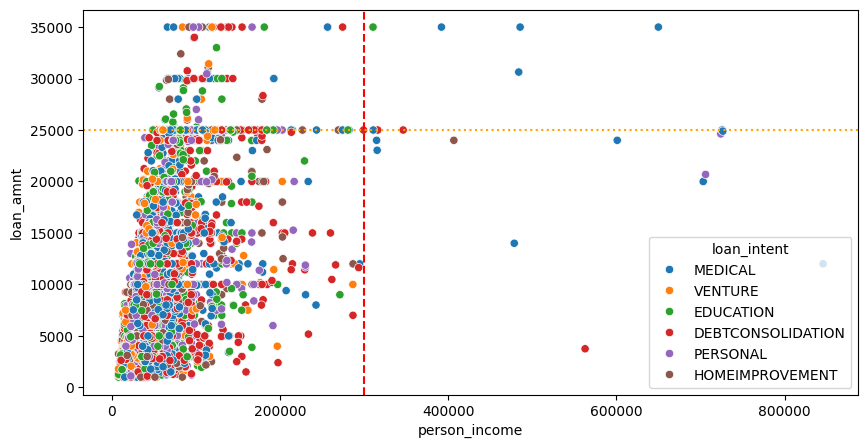

In [36]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'],y =
loan_status_approved_male['loan_amnt'],hue = loan_status_approved_male['loan_intent'])
plt.axvline(300000,linestyle = '--',color = 'red')
plt.axhline(25000,linestyle = ':',color = 'orange')
plt.show()

In [41]:
loan_status_notapproved_male = df[(df['loan_status'] == 0) & (df['person_gender'] == 'male')]

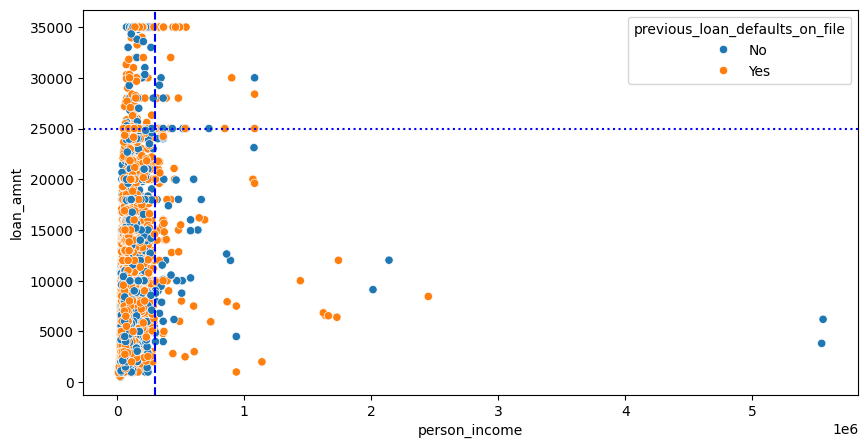

In [42]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'],y = loan_status_notapproved_male['loan_amnt'],hue = loan_status_notapproved_male['previous_loan_defaults_on_file'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

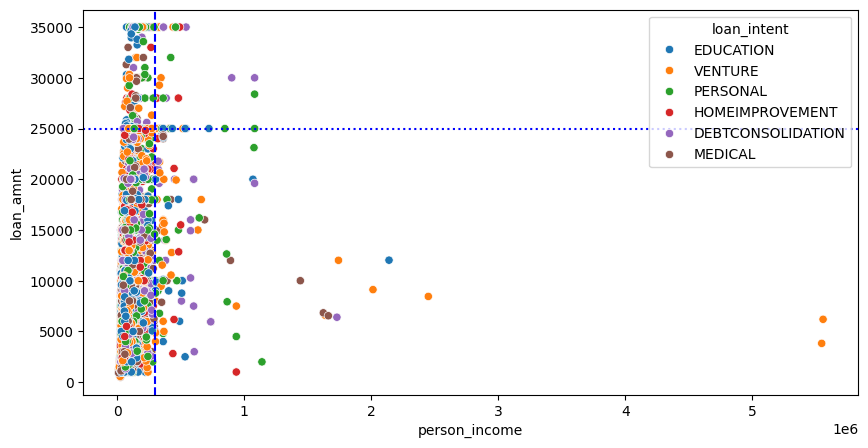

In [43]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'],y = loan_status_notapproved_male['loan_amnt'],hue = loan_status_notapproved_male['loan_intent'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()